In [53]:
!git clone https://github.com/MfonobongIme/Track

fatal: destination path 'Track' already exists and is not an empty directory.


# Importing our libraries

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import random
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import pickle
import ntpath
from imgaug import augmenters as iaa
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
from keras.layers import Convolution2D

# Loading Our Data

In [44]:
datadir = 'track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1) #this enables us see all the data in each row
data.head(5)

C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


center  \
0  C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\center_2021_01_01_22_58_39_803.jpg   
1  C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\center_2021_01_01_22_58_39_905.jpg   
2  C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\center_2021_01_01_22_58_40_005.jpg   
3  C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\center_2021_01_01_22_58_40_113.jpg   
4  C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\center_2021_01_01_22_58_40_217.jpg   

                                                                                           left  \
0   C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\left_2021_01_01_22_58_39_803.jpg   
1   C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\left_2021_01_01_22_58_39_905.jpg   
2   C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\left_2021_01_01_22_58_40_005.jpg   
3   C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\left_2021_01_01_22_58_40_113.jpg   
4   C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\left_2021_01_01_22_58_40_217.jpg   

                                                                                           right  \
0   C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\right_2021_01_01_22_58_39_803.jpg   
1   C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\right_2021_01_01_22_58_39_905.jpg   
2   C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\right_2021_01_01_22_58_40_005.jpg   
3   C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\right_2021_01_01_22_58_40_113.jpg   
4   C:\Users\hp\Desktop\projects_git\self_driving_car\data\IMG\right_2021_01_01_22_58_40_217.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0        0.000082  
1  0.0       0.0       0        0.000082  
2  0.0       0.0       0        0.000082  
3  0.0       0.0       0        0.000082  
4  0.0       0.0       0        0.000082

In [45]:
#this function returns only the tail end of the paths in the specified columns(center, left, right)
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

In [46]:
data.head(5)

center                              left  \
0  center_2021_01_01_22_58_39_803.jpg  left_2021_01_01_22_58_39_803.jpg   
1  center_2021_01_01_22_58_39_905.jpg  left_2021_01_01_22_58_39_905.jpg   
2  center_2021_01_01_22_58_40_005.jpg  left_2021_01_01_22_58_40_005.jpg   
3  center_2021_01_01_22_58_40_113.jpg  left_2021_01_01_22_58_40_113.jpg   
4  center_2021_01_01_22_58_40_217.jpg  left_2021_01_01_22_58_40_217.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2021_01_01_22_58_39_803.jpg  0.0       0.0       0        0.000082  
1  right_2021_01_01_22_58_39_905.jpg  0.0       0.0       0        0.000082  
2  right_2021_01_01_22_58_40_005.jpg  0.0       0.0       0        0.000082  
3  right_2021_01_01_22_58_40_113.jpg  0.0       0.0       0        0.000082  
4  right_2021_01_01_22_58_40_217.jpg  0.0       0.0       0        0.000082

# Data Visualization

In [47]:
num_bins = 25 #make sure this is an odd number in order to obtain a centered distribution
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


<BarContainer object of 25 artists>

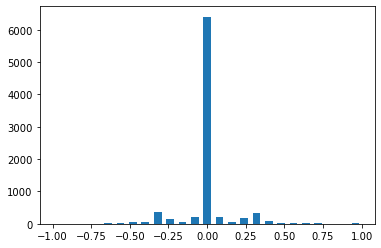

In [48]:
plt.bar(center, hist, width = 0.05)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


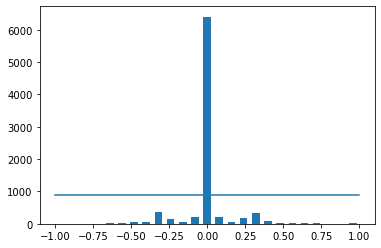

In [49]:
num_bins = 25 #make sure this is an odd number in order to obtain a centered distribution
samples_per_bin = 900 #since we have so much data to when the car's steering was driving straight(0) we discard some of it to make sure we have a more balanced data so we wont have a bias of the car driving straight. So we restrict each number of bin to contain just 900 samples to account for this
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
print(bins)
plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin)) #this draws a line where our maximum number of bins will be located

removed: 5505
total data: 8376
remaining: 2871


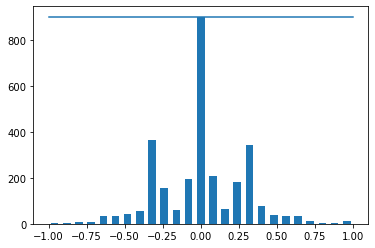

In [50]:
#make our distribution uniform

remove_list = []
for j in range(num_bins): #loop through all the bins
    list_ = []
    for i in range(len(data['steering'])): #loop through every steering angle in the current bin being iterated through
        
        #if the steering angle falls in between two bins, then it belongs to the current 
        #bin j that it is being iterated through
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j + 1]:
            
            #append each index of the steering angle value falling in the appropriate category to the list
            list_.append(i)
    
    list_ = shuffle(list_) #we shuffle so we still preserve information from all parts of the track when we are cutting off steering data above 450
    list_ = list_[samples_per_bin:] #we remove steering data above 450
    remove_list.extend(list_) #we dispose what we want to dispose into remove_list

print('removed:', len(remove_list)) #prints length of removed list
print('total data:', len(data)) #prints length of data we started with
data.drop(data.index[remove_list], inplace = True) #drop specific rows in our dataframe which corresponds to these indices inside removed list
print('remaining:', len(data)) #print length of remaining data

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

# Training and validation split

In [51]:
print(data.iloc[1])
#assigns images as training data and steering as label
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)): #loops through our data
        indexed_data = data.iloc[i] #selects the data in each row and stores in this variable
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip())) #append all center images to image_path
        steering.append(float(indexed_data[3])) #append all steerings images to steering
    image_paths = np.asarray(image_path) #convert to array for better maniuplation
    steerings = np.asarray(steering) #convert to array for better manipulation
    return image_paths, steerings
image_paths, steerings = load_img_steering(datadir + '\IMG', data)

center      center_2021_01_01_22_58_41_789.jpg
left        left_2021_01_01_22_58_41_789.jpg  
right       right_2021_01_01_22_58_41_789.jpg 
steering    0                                 
throttle    1                                 
reverse     0                                 
speed       13.1454                           
Name: 19, dtype: object


In [52]:
#train test valid split

x_train, x_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state = 6)
print('Training samples: {}\nValid samples: {}'.format(len(x_train), len(x_valid)))


Training samples: 2296
Valid samples: 575


Text(0.5, 1.0, 'valid set')

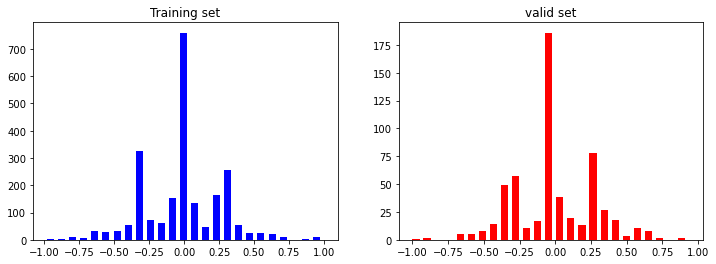

In [53]:
#to ensure we have a uniform distribution of steering angles in our training and valid data
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
axes[0].hist(y_train, bins = num_bins, width = 0.05, color = 'blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins = num_bins, width = 0.05, color = 'red')
axes[1].set_title('valid set')

# Data Augmentation

In [54]:
#FIRST AUGMENTATION: ZOOM
#this function zooms into our image(allows our model to have a closer look at some of the features in the image)

def zoom(image):
    zoom = iaa.Affine(scale = (1, 1.3)) #defined range for zoom
    image = zoom.augment_image(image) #apply the zoom parameter to image and augment it
    return image

Text(0.5, 1.0, 'Zoomed Image')

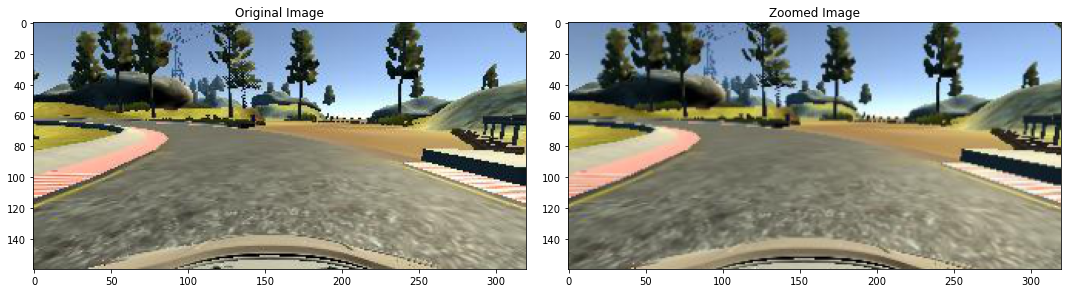

In [55]:
#visualize the augmentation above

image = image_paths[random.randint(0, 100)] #select a random image from image_path
original_image = mpimg.imread(image) #read the randomly selected image from image_paths and store in original_image variable
zoomed_image = zoom(original_image) #use zoom image funtion to perform the augmentation on the image

#plot the two images to compare them
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')


In [56]:
#SECOND AUGMENTAION: Image PANNING
#Image Panning function returns the vertical or horizontal translation of the image)

def pan(image):
    pan = iaa.Affine(translate_percent = {'x' : (-0.1, 0.1), 'y': (-0.1, 0.1)}) #specify horizontal range x, setting the range from -0.1 to 0.1 meaning anywhere from 10% left to 10% right, and similarly we do the same thing for vertical y axis(up or down) 
    image = pan.augment_image(image)
    return image

Text(0.5, 1.0, 'Panned Image')

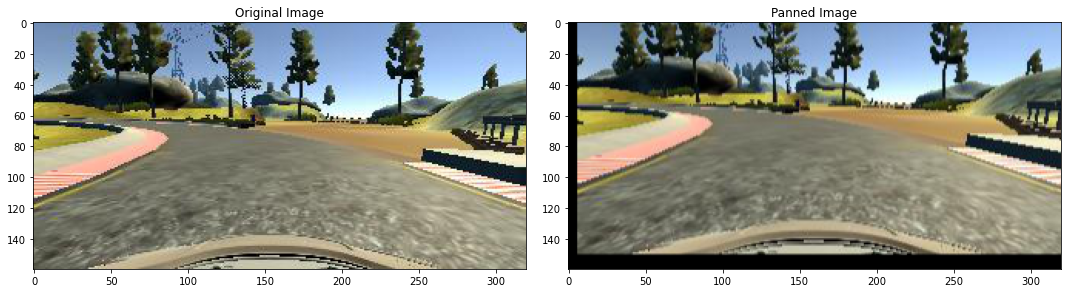

In [57]:
#visualize the augmentation above

image = image_paths[random.randint(0, 100)] #select a random image from image_path
original_image = mpimg.imread(image) #read the randomly selected image from image_paths and store in original_image variable
panned_image = pan(original_image) #use pan image funtion to perform the augmentation on the image

#plot the two images to compare them
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')


In [58]:
#THIRD AUGMENTATION: Altering Brightness
#this function plays around with the brightness of the image, making it brighter or darker

def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2)) #multiplies all the pixel intensities inside the image, thus any pixel intensity multipled by a value less than 1 will become darker
    image = brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Brightness Altered Image')

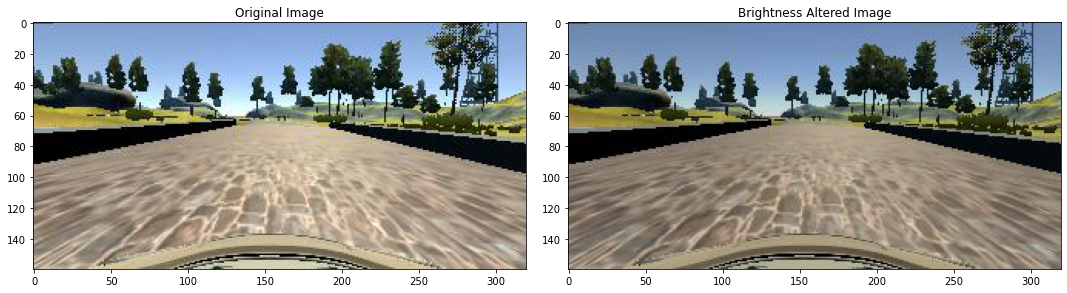

In [59]:
#visualize the augmentation above

image = image_paths[random.randint(0, 100)] #select a random image from image_path
original_image = mpimg.imread(image) #read the randomly selected image from image_paths and store in original_image variable
brightness_altered_image = img_random_brightness(original_image) #use img_random_brightness funtion to perform the augmentation on the image

#plot the two images to compare them
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)

axs[1].set_title('Brightness Altered Image')

In [60]:
#SECOND AUGMENTAION: Flipping

def img_random_flip(image, steering_angle):
    image = cv2.flip(image, 1) #we give it a value of 1 which is horizontal flipping
    steering_angle = -steering_angle #flip the steering angle too
    return image, steering_angle
    

Text(0.5, 1.0, 'Flipped ImageSteering Angle:0.3020843')

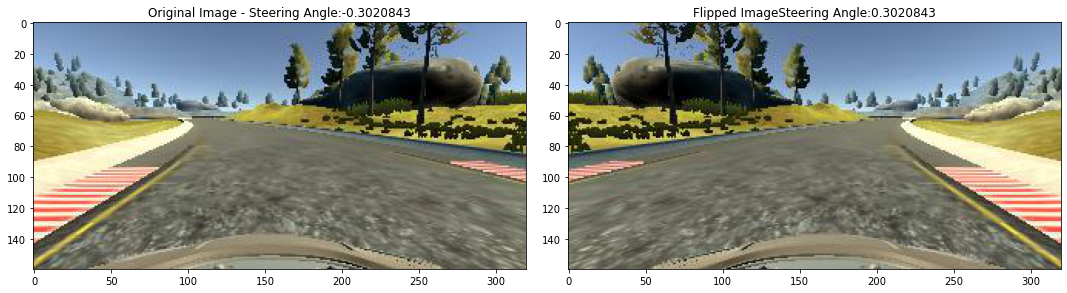

In [61]:
#visualize the augmentation above

random_index = random.randint(0, 100)
image = image_paths[random_index] #select random image from image_paths
steering_angle = steerings[random_index] #select steering angle from random index

original_image = mpimg.imread(image) 
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle) #use img_random_flip funtion to perform the augmentation on the image

#plot the two images to compare them
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)

axs[1].set_title('Flipped Image' + 'Steering Angle:' + str(flipped_steering_angle))

In [62]:
#this function randomizes the occurence of our augmentation functions to increase the number of varieties our model needs to work with

def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)
    return image, steering_angle

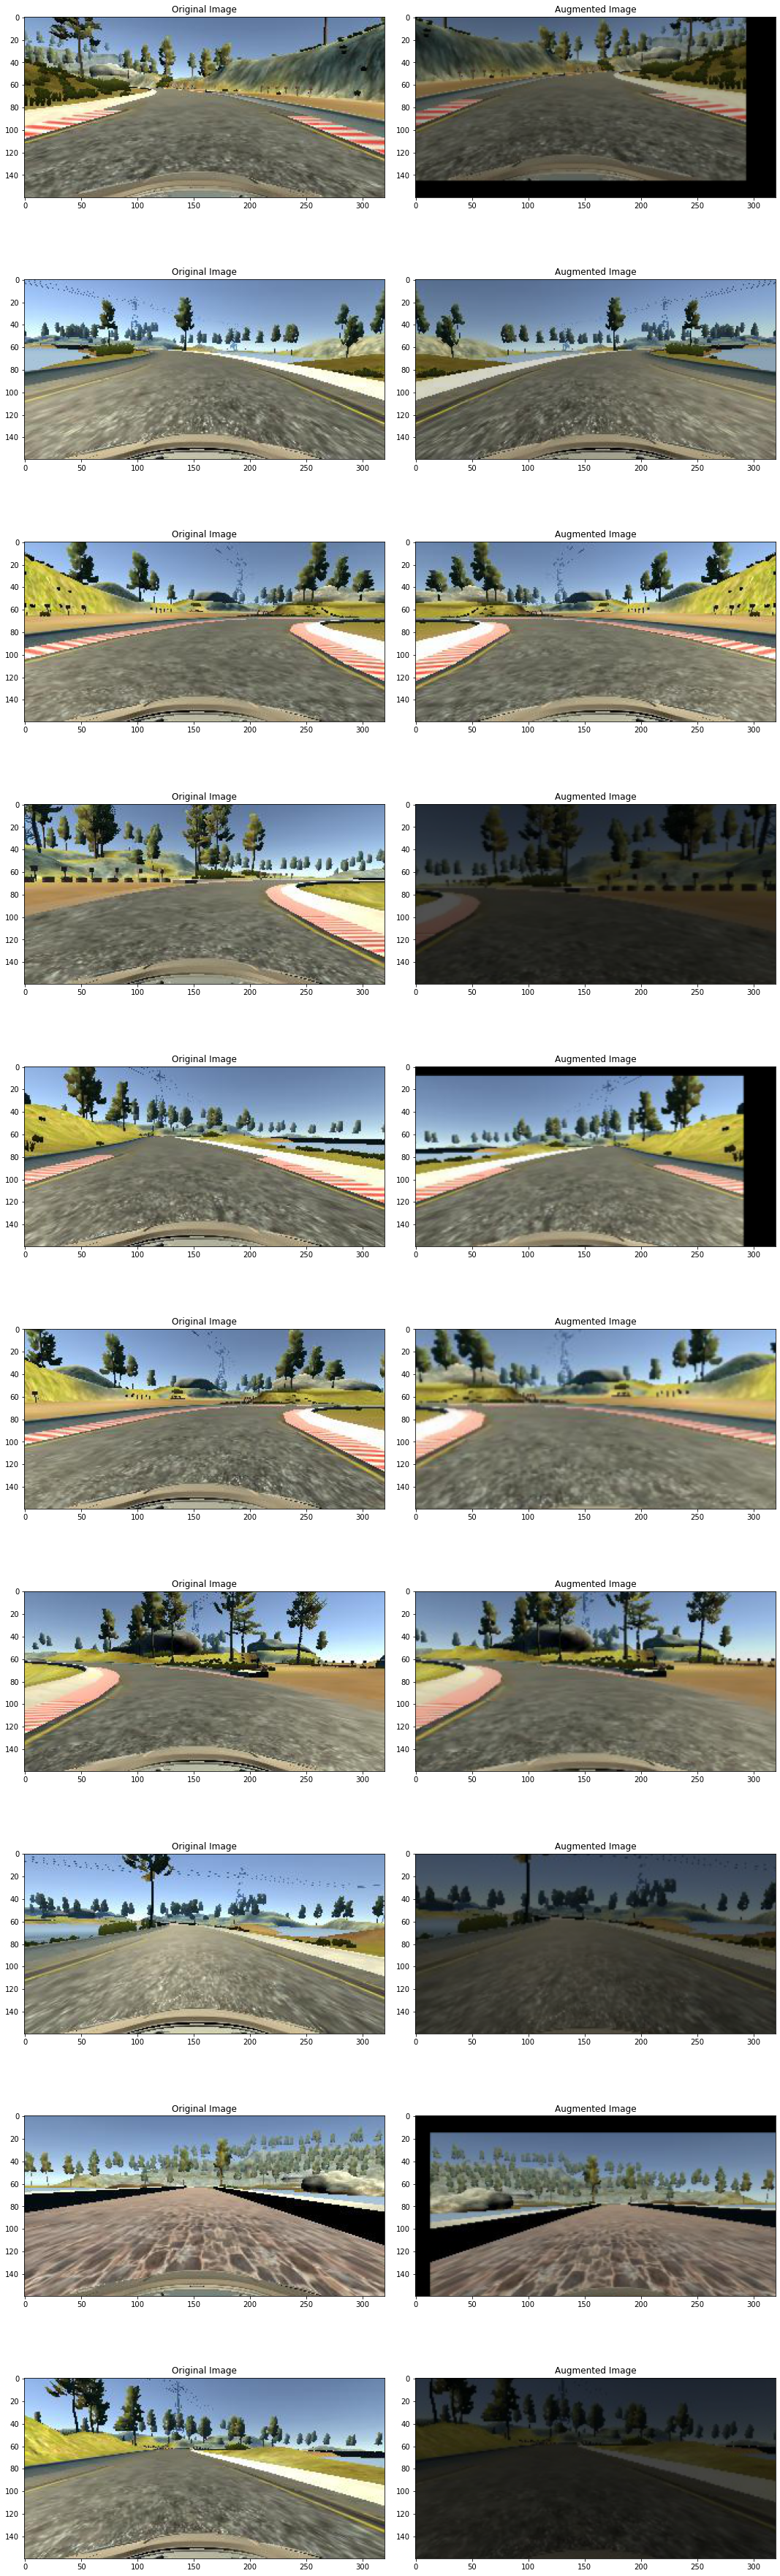

In [63]:
#visualize how the agumentation functions are working together to diversify our datset
ncol = 2
nrow = 10
fig, axs = plt.subplots(nrow, ncol, figsize = (15, 50))
fig.tight_layout()

for i in range(10): #iterate 10 times
    randnum = random.randint(0, len(image_paths) - 1) #random nnumber returned will be used as the index value in our array to get a random image from our dataset each time
    
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]
    
    original_image = mpimg.imread(random_image)
    augmented_image, steering = random_augment(random_image, random_steering)
    
    axs[i][0].imshow(original_image)
    axs[i][0].set_title('Original Image')
    
    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title('Augmented Image')
    
    
    
    

# Data Preprocessing

In [64]:
#this function reads our image
def img_preprocessing(img):
    img = img[60:135, :, :] #crops out our region of interest
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) #converts to yuv as recommended by nvidia
    img = cv2.GaussianBlur(img, (3, 3), 0) #apply gaussian blur to reduce noise
    img = cv2.resize(img, (200, 66)) #resize our image
    img = img/255 #normalize our image
    return img    

Text(0.5, 1.0, 'Preprocessed Image')

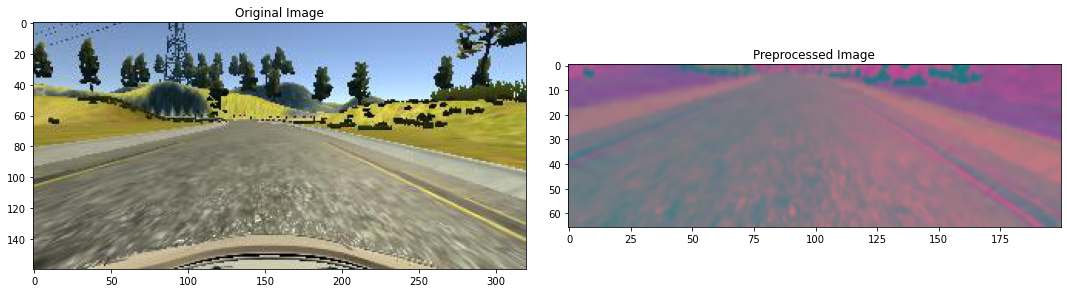

In [65]:
#visualize a random image
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocessing(original_image)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

# Batch Generator

In [24]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []
        
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            
            #if its training data
            if istraining:
                im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
            #if its not training data i.e if its validation data
            else:
                im = mpimg.imread(image_paths[random_index])
                steering = steering_ang[random_index]
            
            #preprocess the image
            im = img_preprocessing(im)
            batch_img.append(im)
            batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

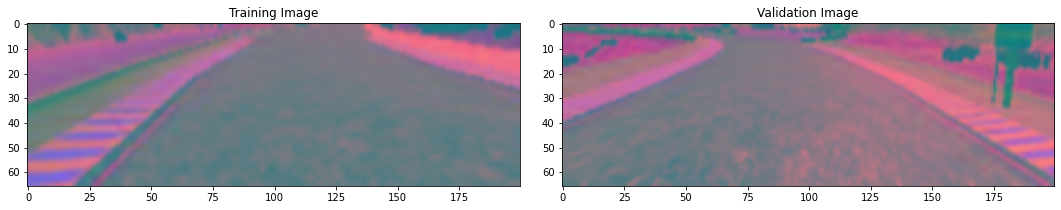

In [38]:
#We use next statement to request the next batch of images from our generator

x_train_gen, y_train_gen = next(batch_generator(x_train, y_train, 1, 1)) #batch of one and bolean set to one for training data
x_valid_gen, y_valid_gen = next(batch_generator(x_valid, y_valid, 1, 0))#batch of one and bolean set to zero for validation data

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()

#visualize training image(augmented image) and validation image side by side
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

# NVIDIA MODEL : Which is appropriate for self driving cars

In [39]:
def nvidia_model():
    model = Sequential()
    model.add(Convolution2D(24, 5, 5, subsample = (2, 2), input_shape = (66, 200, 3), activation = 'elu'))
    model.add(Convolution2D(36, 5, 5, subsample = (2, 2), activation = 'elu'))
    model.add(Convolution2D(48, 5, 5, subsample = (2, 2), activation = 'elu'))
    model.add(Convolution2D(64, 3, 3, activation = 'elu'))
    model.add(Convolution2D(64, 3, 3, activation = 'elu'))
    #model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(100, activation = 'elu')) 
    #model.add(Dropout(0.5))
    
    model.add(Dense(50, activation = 'elu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(10, activation = 'elu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(1))
    
    optimizer = Adam(lr = 1e-4)
    model.compile(loss = 'mse', optimizer = optimizer)
    return model

In [40]:
#model summary
model = nvidia_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
C:\Users\hp\Anaconda3\envs\tensorflw\lib\site-packages\ipykernel_launcher.py:7: Us

In [41]:
history= model.fit_generator(batch_generator(x_train, y_train, 100, 1), 
                       steps_per_epoch = 300, 
                       epochs = 10, 
                       validation_data = batch_generator(x_valid, y_valid, 100, 0), 
                       validation_steps = 200, 
                       verbose = 1, 
                       shuffle = 1)

Epoch 1/10
300/300 [==============================] - 383s 1s/step - loss: 0.0678 - val_loss: 0.0603
Epoch 2/10
300/300 [==============================] - 393s 1s/step - loss: 0.0578 - val_loss: 0.0368
Epoch 3/10
300/300 [==============================] - 362s 1s/step - loss: 0.0516 - val_loss: 0.0404
Epoch 4/10
300/300 [==============================] - 343s 1s/step - loss: 0.0480 - val_loss: 0.0476
Epoch 5/10
300/300 [==============================] - 336s 1s/step - loss: 0.0462 - val_loss: 0.0474
Epoch 6/10
300/300 [==============================] - 335s 1s/step - loss: 0.0448 - val_loss: 0.0346
Epoch 7/10
300/300 [==============================] - 336s 1s/step - loss: 0.0435 - val_loss: 0.0488
Epoch 8/10
300/300 [==============================] - 337s 1s/step - loss: 0.0411 - val_loss: 0.0394
Epoch 9/10
300/300 [==============================] - 338s 1s/step - loss: 0.0418 - val_loss: 0.0461
Epoch 10/10
300/300 [==============================] - 340s 1s/step - loss: 0.0411 - val_lo

Text(0.5, 0, 'epoch')

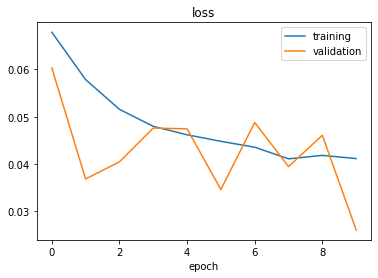

In [42]:
#loss function plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

In [74]:
model.save('model.h5')